In [1]:
import numpy as np
from analysis.dataset import Dataset

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import svm
from sklearn import neural_network
from sklearn.grid_search import GridSearchCV

import pandas as pd

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
dataset_path = 'Dataset/default.csv'
data = pd.read_csv(dataset_path, index_col=0)

In [3]:
X = data.iloc[:,:-1].values
y = data.label.values

In [4]:
from scipy.stats import gmean
    
def perplexity(estimator, X, y):
    likelihoods = [p if t == 1.0 else 1-p for (t, p) in zip(y, estimator.predict_proba(X).T[1])]
    return gmean(likelihoods)

In [16]:
feature_normalization = StandardScaler()
feature_selection = SelectKBest(f_classif, k='all')
classifier = LogisticRegression()
nn = neural_network.multilayer_perceptron.MLPClassifier()
cl = svm.SVC()
pipeline = Pipeline([
    ('preprocessing', feature_normalization),
    ('feature-selection', feature_selection),
    ('classifier', nn)
])


Cs = np.logspace(-3, 3, 7)
pipelineOptimalC = GridSearchCV(
    estimator=pipeline,
    scoring=perplexity,
    param_grid={
        'classifier__C': Cs
    }
)

In [17]:
cross_val_score(pipeline, X, y, cv=10).mean()

0.9565810898827618

In [7]:
pipelineOptimalC = pipeline.fit(X, y)
classifierOptimalC = pipelineOptimalC.named_steps['classifier']
optimalFeatureSelection = pipelineOptimalC.named_steps['feature-selection']

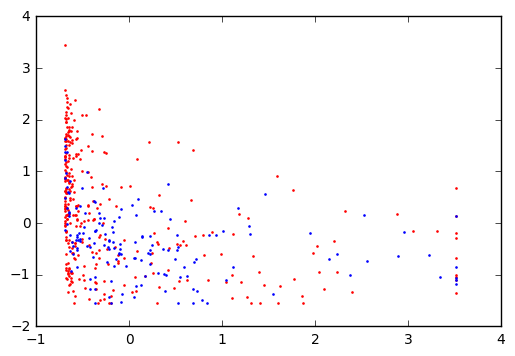

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
Xt = pipelineOptimalC.named_steps['preprocessing'].transform(X)
plt.scatter(Xt[y == 'EP', 10], Xt[y == 'EP', 70], .8, color='red')
plt.scatter(Xt[y == 'NEP', 10], Xt[y == 'NEP', 70], .8, color='blue')